# Edge Detection Using OpenCV

Edges are characterized by sudden changes in pixel intensity. To detect edges, we need to go looking for such changes in the neighboring pixels. Come, let’s explore the use of two important edge-detection algorithms available in OpenCV: Sobel Edge Detection and Canny Edge Detection. We will discuss  the theory as well as  demonstrate the use of each in OpenCV.

First, take a look at the code that will demonstrate edge detection. Each line of code will be discussed in detail  so that you understand it fully.

In [ ]:
# import the necessary packages
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read the original image
img = cv2.imread('data/tiger.PNG') 
# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)

In [ ]:
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img, (3,3), 0) 

### Sobel Edge Detection

Sobel Edge Detection is one of the most widely used algorithms for edge detection. The Sobel Operator detects edges that are marked by sudden changes in pixel intensity, as shown in the figure below.

These are the kernels used for Sobel Edge Detection:

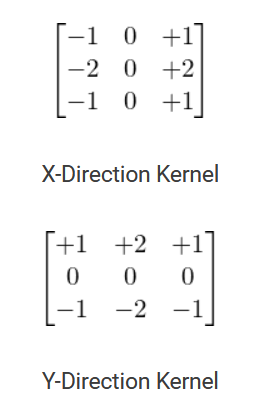

When these kernels are convolved with the original image, you get a ‘Sobel edge image’. 

If we use only the Vertical Kernel, the convolution yields a Sobel image, with edges enhanced in the X-direction.
Using the Horizontal Kernel yields a Sobel image, with edges enhanced in the Y-direction. 

In [ ]:
# Sobel Edge Detection on the X axis
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 

# Sobel Edge Detection on the Y axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) 

# Combined X and Y Sobel Edge Detection
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) 

# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)

### Canny Edge Detection

Canny Edge Detection is one of the most popular edge-detection methods in use today because it is so robust and flexible.The algorithm itself follows a three-stage process for extracting edges from an image. Add to it image blurring, a necessary preprocessing step to reduce noise. This makes it a four-stage process, which includes:

    Noise Reduction
    Calculating Intensity Gradient of the Image
    Suppression of False Edges
    Hysteresis Thresholding

**Noise Reduction**

Raw image pixels can often lead to noisy edges, so it is important to reduce noise before computing edges In Canny Edge Detection, a Gaussian blur filter is used to essentially remove or minimize unnecessary detail that could lead to undesirable edges. Have a look at the tiger in the two images below, Gaussian blur has been applied to the image to the right. As you can see, it appears slightly blurred, but still retains a significant amount of detail from which edges can be computed.

**Calculating Intensity Gradient of the Image**

Once the image has been smoothed (blurred), it is filtered with a Sobel kernel, both horizontally and vertically. The results from these filtering operations are then used to calculate both the intensity gradient magnitude, and the direction for each pixel.
The gradient direction is then rounded to the nearest 45 degree angle. 

**Suppression of False Edges**

After reducing noise and calculating the intensity gradient, the algorithm in this step uses a technique called non-maximum suppression of edges to filter out unwanted pixels (which may not actually constitute an edge). To accomplish this, each pixel is compared to its neighboring pixels, in the positive and negative gradient direction. If the gradient magnitude of the current pixel is greater than its neighbouring pixels, it is left unchanged. Otherwise, the magnitude of the current pixel is set to zero. The following image illustrates an example.  As you can see, numerous ‘edges’ associated with the fur of the tiger have been significantly subdued.

**Hysteresis Thresholding**

In this final step of Canny Edge Detection, the gradient magnitudes are compared with two threshold values, one smaller than the other. 

    - If the gradient magnitude value is higher than the larger threshold value, those pixels are associated with strong edges, and are included in the final edge map.
    - If the gradient magnitude values are lower than the smaller threshold value, the pixels are suppressed, and excluded from the final edge map.
    - All the other pixels, whose gradient magnitudes fall in between these two thresholds, are marked as ‘weak’ edges (i.e. they become candidates for being included in the final edge map). 
    - If the ‘weak’ pixels are connected  to those associated with strong edges, then they too are included in the final edge map. 

In [ ]:
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)

cv2.destroyAllWindows()

More here: https://learnopencv.com/edge-detection-using-opencv/